In [ ]:
# Heart disease prediction

## Importing libraries

In [14]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import KNNImputer
import missingno as msno
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from warnings import filterwarnings
warnings.filterwarnings("ignore")



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/heart-disease/heart_disease.csv


In [15]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("oktayrdeki/heart-disease")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/heart-disease


## Reading Dataset + Dataset Overview

In [16]:
# Reading Dataset + Dataset Overview
df = pd.read_csv('/kaggle/input/heart-disease/heart_disease.csv')

In [17]:
# Show first 5 rows
df.head(5)

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


In [18]:
# Shape
df.shape

(10000, 21)

In [19]:
# Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

In [ ]:
"""The dataset contains 10000 entries and 21 columns (including numerical and categorical features). It includes health-related data such as age, gender, cholesterol level, blood pressure, BMI and other medical data. The target value is "Heart Disease Status", which indicates whether the individual has heart disease or not."""

In [20]:
"""Lets see if we have unique values in the dataset."""

cat_cols = df.select_dtypes(include=["object"]).columns
print("Categorical Columns:", cat_cols)

for col in cat_cols:
    print(f"{col}: {df[col].unique()}")

Categorical Columns: Index(['Gender', 'Exercise Habits', 'Smoking', 'Family Heart Disease',
       'Diabetes', 'High Blood Pressure', 'Low HDL Cholesterol',
       'High LDL Cholesterol', 'Alcohol Consumption', 'Stress Level',
       'Sugar Consumption', 'Heart Disease Status'],
      dtype='object')
Gender: ['Male' 'Female' nan]
Exercise Habits: ['High' 'Low' 'Medium' nan]
Smoking: ['Yes' 'No' nan]
Family Heart Disease: ['Yes' 'No' nan]
Diabetes: ['No' 'Yes' nan]
High Blood Pressure: ['Yes' 'No' nan]
Low HDL Cholesterol: ['Yes' 'No' nan]
High LDL Cholesterol: ['No' 'Yes' nan]
Alcohol Consumption: ['High' 'Medium' 'Low' nan]
Stress Level: ['Medium' 'High' 'Low' nan]
Sugar Consumption: ['Medium' 'Low' 'High' nan]
Heart Disease Status: ['No' 'Yes']


In [ ]:
"""EDA"""

## EDA

Let's build plots for visualisation categorical data

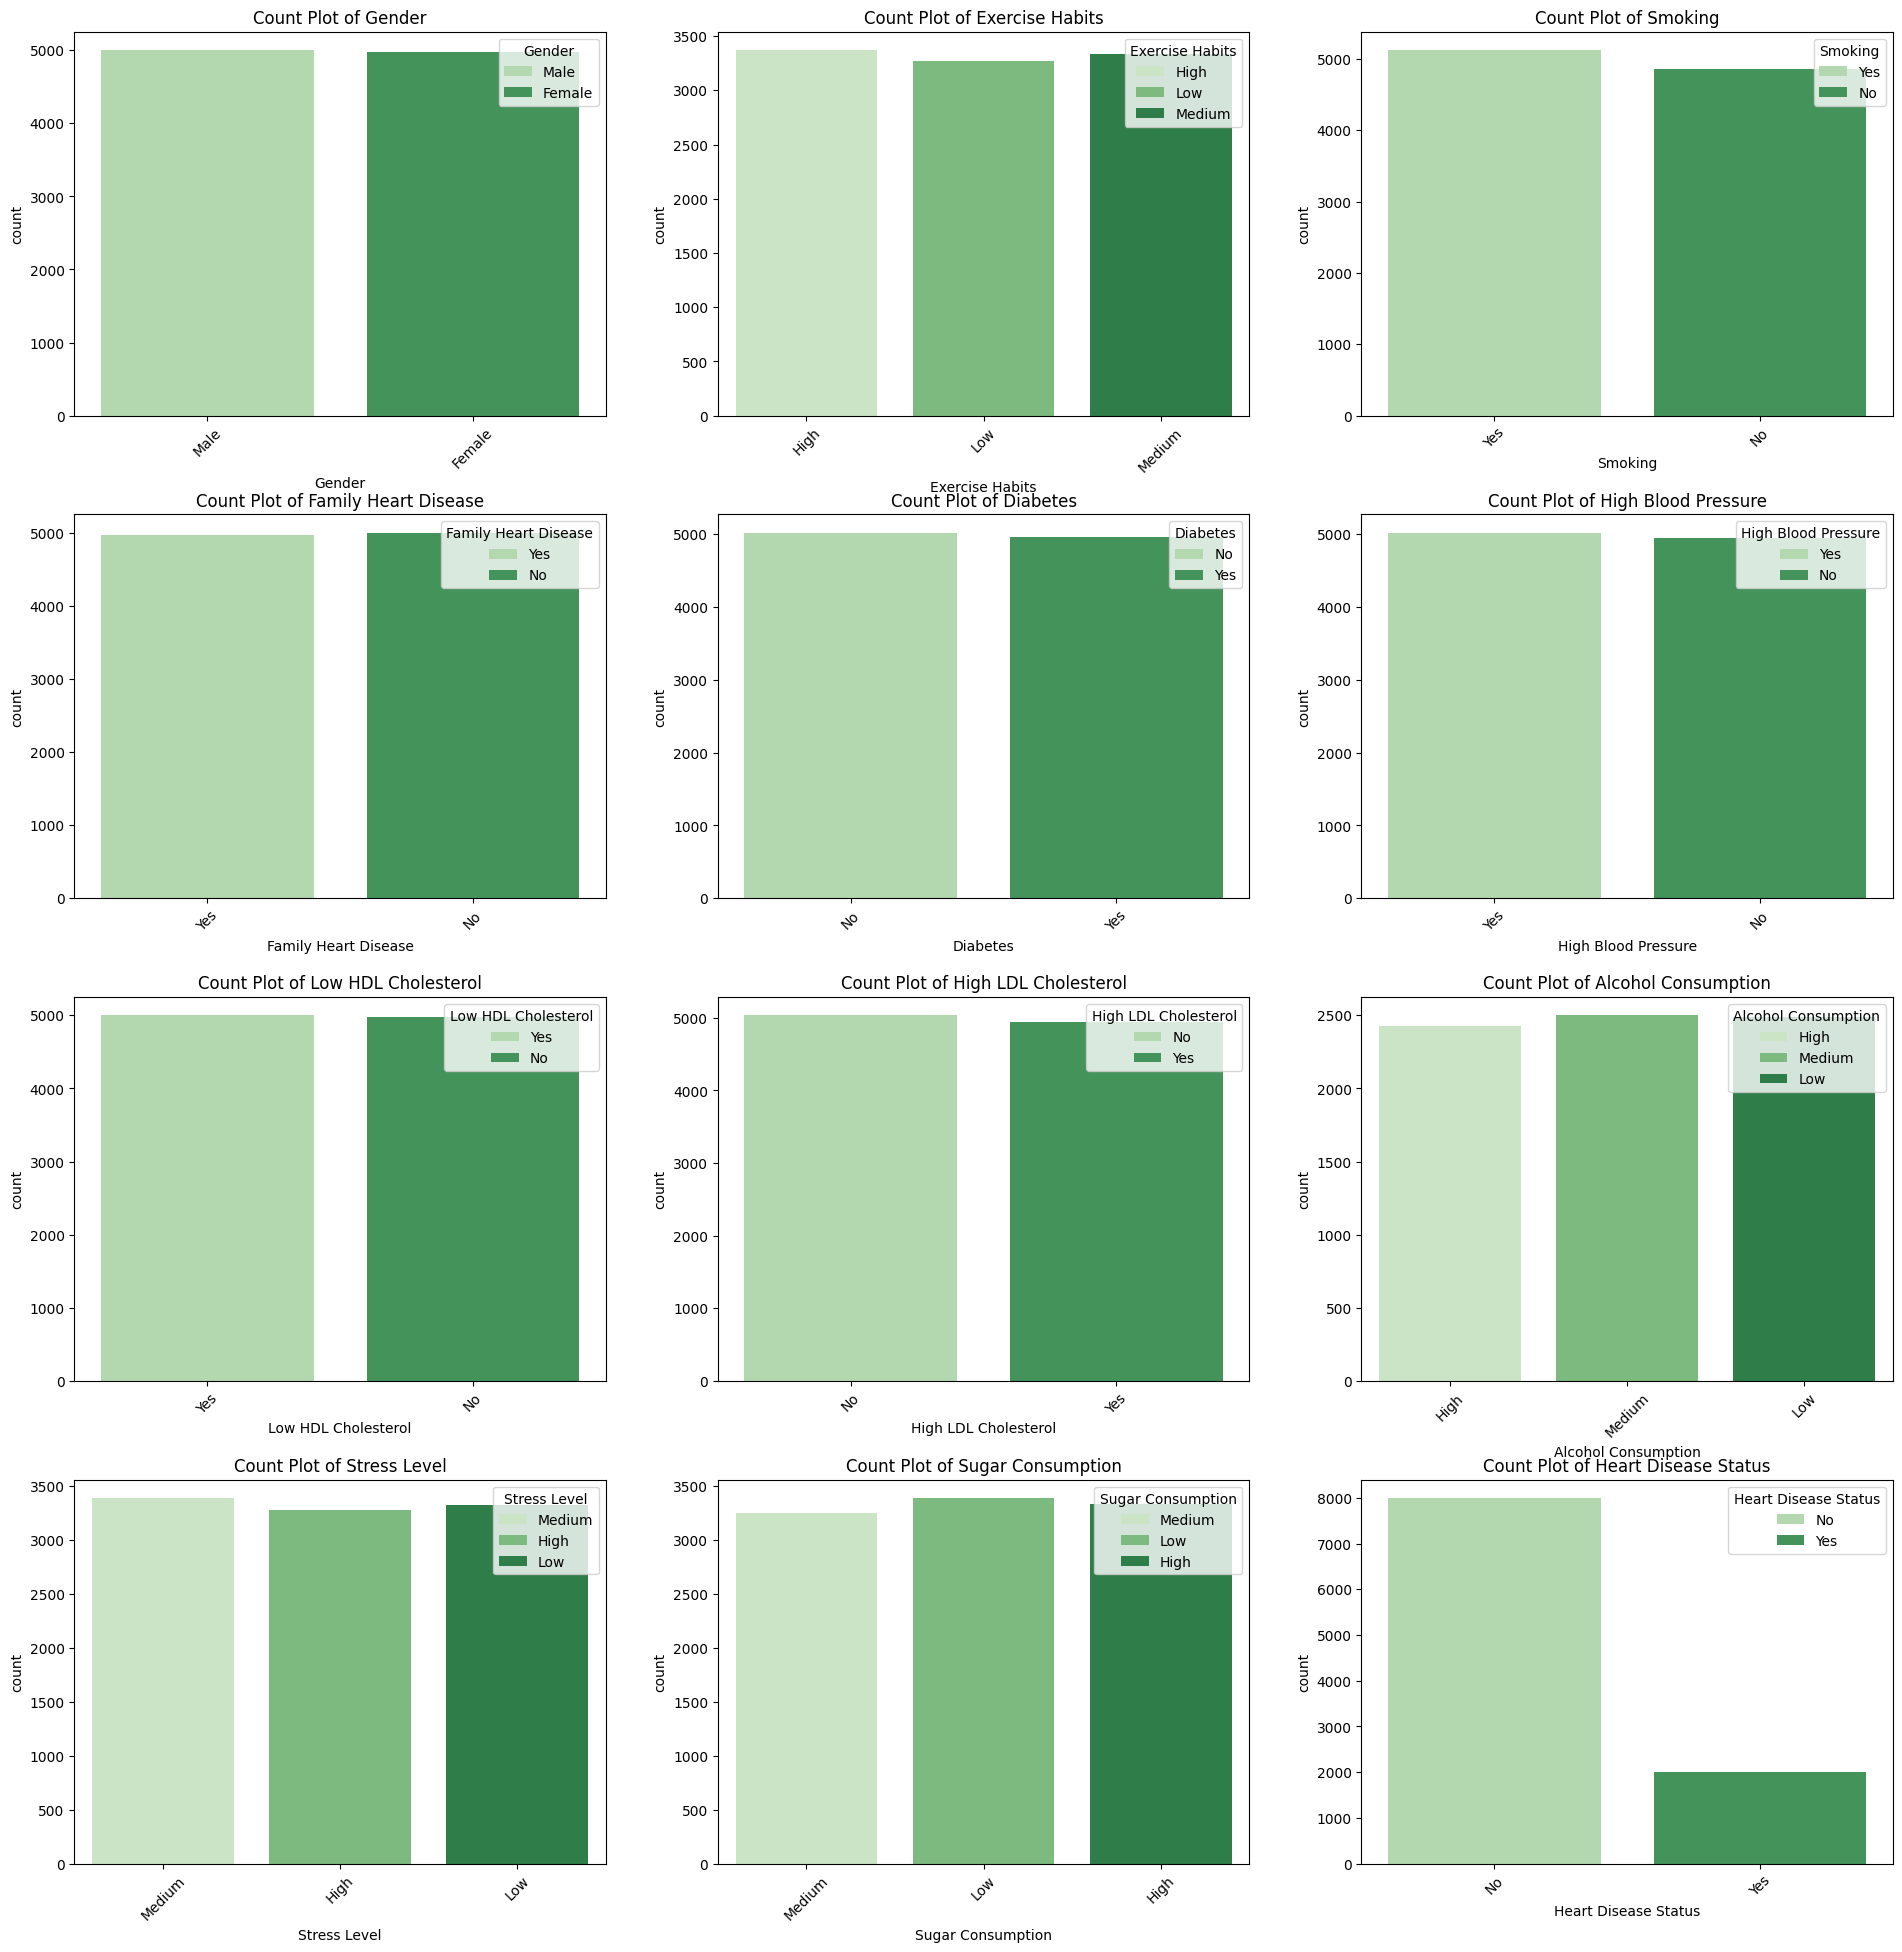

In [21]:
"""Let's build plots for visualisation categorical data"""

fig, axes = plt.subplots(4, 3, figsize=(20, 20))
fig.tight_layout(pad=5.0)
axes = axes.flatten()

for i, col in enumerate(cat_cols[:12]):
    sns.countplot(x=col, data=df, hue=col, palette='Greens', dodge=False, ax=axes[i])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].tick_params(axis='x', rotation=45)
    
# Hide unused subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.show()

In [ ]:
"""The histogram matrix above illustrates the distribution of various health-related factors. By visualising the frequency distribution of each feature, we can observe potential imbalances in the dataset."""

The histogram matrix above illustrates the distribution of various health-related factors. By visualising the frequency distribution of each feature, we can observe potential imbalances in the dataset.
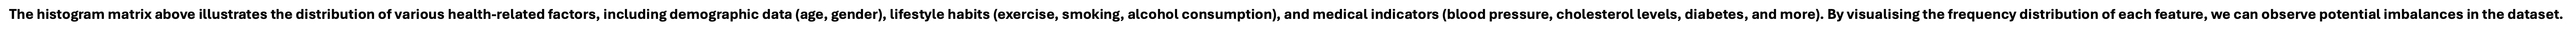
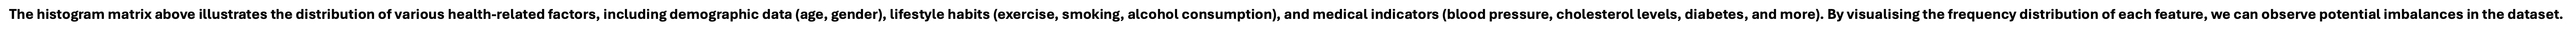
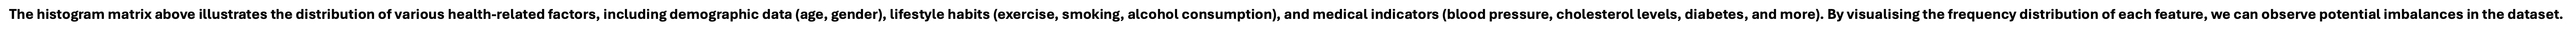
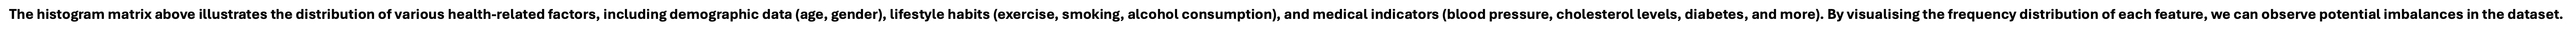

Let's build boxplot to analyse the distribution of numerical features, revealing significant outliers and varying feature scales.

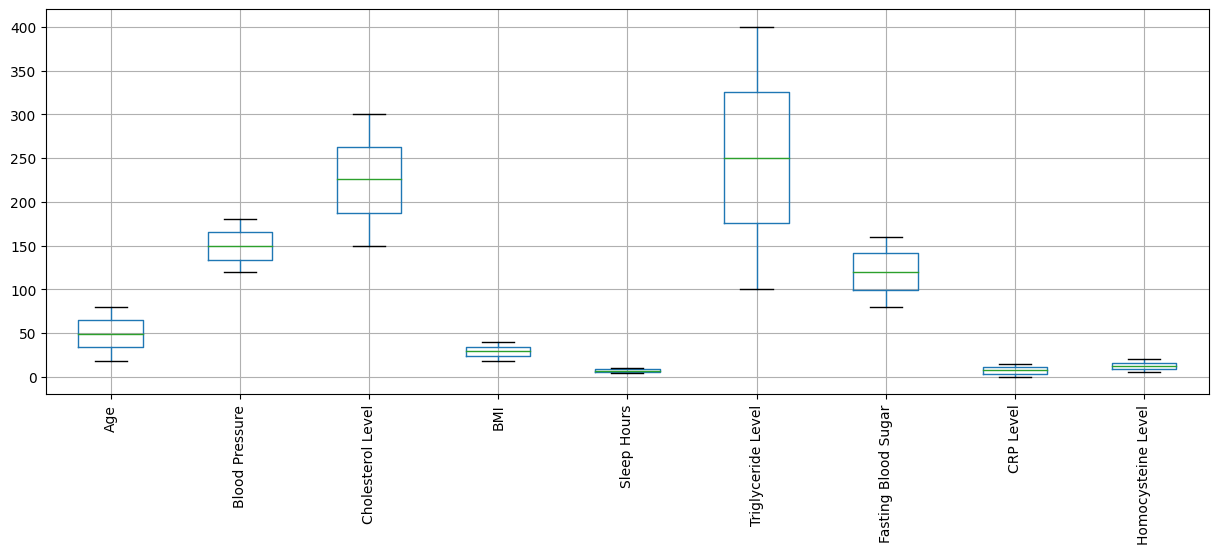

In [22]:
"""Let's build boxplot to analyse the distribution of numerical features, revealing significant outliers and varying feature scales."""

num_cols = df.select_dtypes(include=["number"]).columns
plt.figure(figsize=(15, 5))
df[num_cols].boxplot()
plt.xticks(rotation=90)
plt.show()

Some attributes, like Triglyceride Level, Fasting Blood Sugar, have extreme values that could affect model performance. The large differences in feature ranges indicate a need for normalisation or standardisation before training.

In [ ]:
"""Some attributes, like Triglyceride Level, Fasting Blood Sugar, have extreme values that could affect model performance. The large differences in feature ranges indicate a need for normalisation or standardisation before training."""

In [ ]:
"""Data Pre-processing"""

## Data Pre-processing

Let's check for mussing data

In [23]:
"""Let's check for mussing data"""
df.isna().sum()

Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
Heart Disease Status       0
dtype: int64

Lets check for duplicates

In [24]:
"""Lets check for duplicates"""

df.duplicated().sum()

0

No duplicates in the dataset.

In [ ]:
"""No duplicates in the dataset."""

Then we encoded 12 categorical (object type) variables as numerical.

In [25]:
"""We encoded 12 categorical (object type) variables as numerical."""

from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include=['object']).columns

encoder = LabelEncoder()
label_mappings = {}

for col in categorical_cols:
    mask = df[col].notna()

    df.loc[mask, col] = encoder.fit_transform(df.loc[mask, col])

    label_mappings[col] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

print("Data info:")
print(df.info())

# Display label mappings
for col, mapping in label_mappings.items():
    print(f"Column: {col}")
    for label, code in mapping.items():
        print(f"{code} -> {label}")
    print()

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Con


To handle missing data we used KNNImputer from Scikit-learn. The KNNImputer (n_neighbors=5) replaced missing values by finding the five nearest neighbours for each missing entry and imputing the missing values based on their average.

In [26]:
"""
To handle missing data we used KNNImputer from Scikit-learn. 
The KNNImputer (n_neighbors=5) replaced missing values by finding the five nearest neighbours for each missing entry and imputing the missing values based on their average."""

knn_imputer = KNNImputer(n_neighbors=5)

df_imputed = pd.DataFrame(knn_imputer.fit_transform(df), columns=df.columns)
print(df_imputed)
df = df_imputed

       Age  Gender  Blood Pressure  Cholesterol Level  Exercise Habits  \
0     56.0     1.0           153.0              155.0              0.0   
1     69.0     0.0           146.0              286.0              0.0   
2     46.0     1.0           126.0              216.0              1.0   
3     32.0     0.0           122.0              293.0              0.0   
4     60.0     1.0           166.0              242.0              1.0   
...    ...     ...             ...                ...              ...   
9995  25.0     0.0           136.0              243.0              2.0   
9996  38.0     1.0           172.0              154.0              2.0   
9997  73.0     1.0           152.0              201.0              0.0   
9998  23.0     1.0           142.0              299.0              1.0   
9999  38.0     0.0           128.0              193.0              2.0   

      Smoking  Family Heart Disease  Diabetes        BMI  High Blood Pressure  \
0         1.0                 

We generated a heatmap to visualise the correlation between numerical features in the dataset. It helps identify relationships between variables, but in this case, there is no significant correlation between the features.

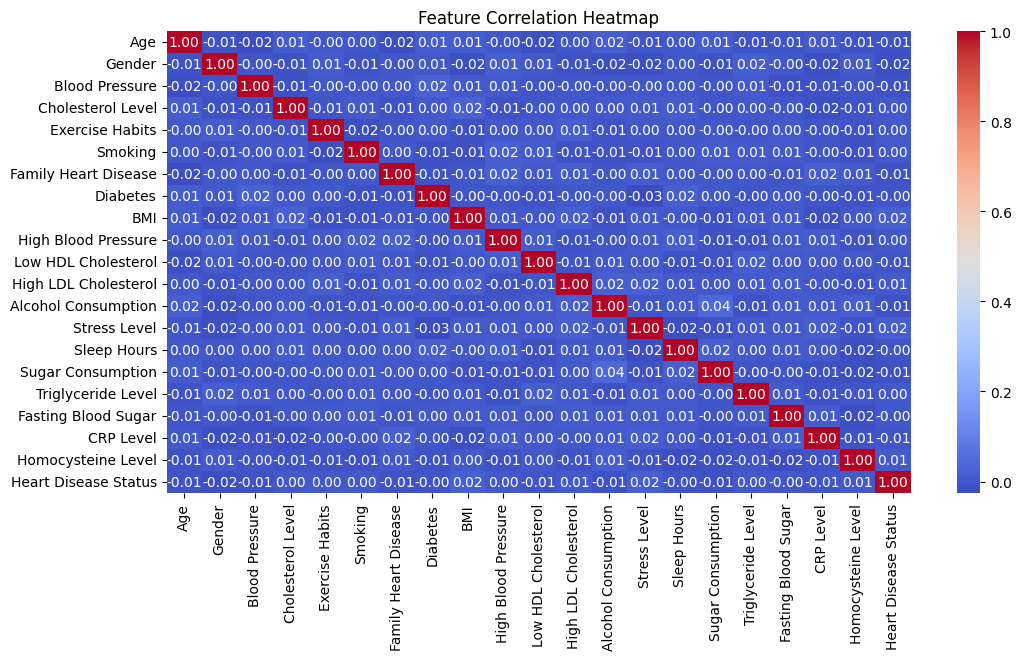

In [27]:
"""
We generated a heatmap to visualise the correlation between numerical features in the dataset. 
It helps identify relationships between variables, but in this case, there is no significant correlation between the features."""

corr_matrix = df.corr()

plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

The we scaled all numerical features to a [0, 1] range using MinMaxScaler to ensure equal contribution to model training. The target variable (Heart Disease Status) is preserved without scaling since it's a classification label. The scaled features are combined back with the original target column for further analysis.

In [28]:
"""
The we scaled all numerical features to a [0, 1] range using MinMaxScaler to ensure equal contribution to model training. 
The target variable (Heart Disease Status) is preserved without scaling since it's a classification label. 
The scaled features are combined back with the original target column for further analysis."""

scaler = MinMaxScaler()

Grade_column = df['Heart Disease Status']
df_scaled = scaler.fit_transform(df)
df = pd.DataFrame(df_scaled, columns=df.columns)

df['Heart Disease Status'] = Grade_column

df

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,0.612903,1.0,0.550000,0.033333,0.0,1.0,1.0,0.0,0.317756,1.0,...,0.0,0.0,1.0,0.605503,1.0,0.806667,0.5100,0.864751,0.492507,0.0
1,0.822581,0.0,0.433333,0.906667,0.0,0.0,1.0,1.0,0.328222,0.0,...,0.0,1.0,0.0,0.790657,1.0,0.110000,0.9625,0.623722,0.953319,0.0
2,0.451613,1.0,0.100000,0.440000,0.5,0.0,0.0,0.0,0.538899,0.0,...,1.0,0.5,0.5,0.073314,0.5,0.976667,0.1500,0.847452,0.415412,0.0
3,0.225806,0.0,0.033333,0.953333,0.0,1.0,1.0,0.0,0.278604,1.0,...,1.0,0.5,0.0,0.208156,0.0,0.643333,0.1750,0.834058,0.064120,0.0
4,0.677419,1.0,0.766667,0.613333,0.5,1.0,1.0,1.0,0.112914,1.0,...,0.0,0.5,0.0,0.505116,0.0,0.543333,0.9250,0.692144,0.210260,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.112903,0.0,0.266667,0.620000,1.0,1.0,0.0,0.0,0.035735,1.0,...,1.0,1.0,0.0,0.472443,1.0,0.810000,0.6625,0.239116,0.942193,1.0
9996,0.322581,1.0,0.866667,0.026667,1.0,0.0,0.0,0.0,0.629894,1.0,...,1.0,0.5,0.0,0.707940,0.5,0.923333,0.0375,0.177052,0.314390,1.0
9997,0.887097,1.0,0.533333,0.340000,0.0,1.0,0.0,1.0,0.404521,0.0,...,1.0,0.2,0.5,0.072701,0.5,0.493333,0.1000,0.293810,0.299503,1.0
9998,0.080645,1.0,0.366667,0.993333,0.5,1.0,0.0,1.0,0.771169,1.0,...,1.0,1.0,0.0,0.754369,1.0,0.043333,0.9125,0.481010,0.458253,1.0


Let's create bar plot to illustrate the distribution of the target variable Heart Disease Status.

Heart Disease Status
0.0    8000
1.0    2000
Name: count, dtype: int64


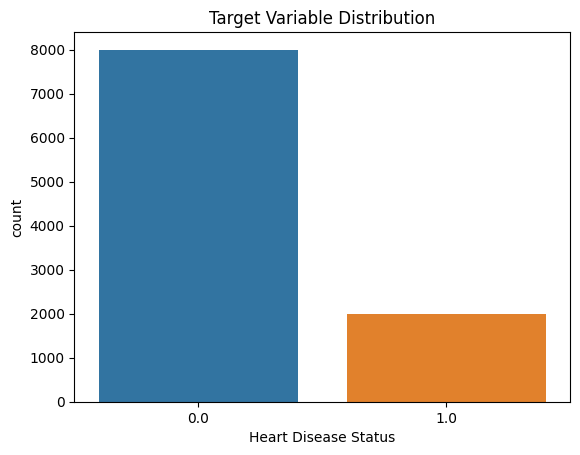

In [29]:
"""Let's create bar plot to illustrate the distribution of the target variable Heart Disease Status."""

print(df["Heart Disease Status"].value_counts())

sns.countplot(x=df["Heart Disease Status"])
plt.title("Target Variable Distribution")
plt.show()

We can clearly see class imbalance where most samples belong to the no-disease (0) category. This imbalance can lead to a biased model favouring the majority class, reducing predictive performance for the minority class (heart disease cases)
So, using pandas, we performed manual upsampling for class 1.0. We balanced the data using duplication. This ensures the model learns both classes equally, improving accuracy, recall, and F1-score for the minority class. Balancing the data prevents bias, making the model more reliable and effective in predicting both classes.

In [ ]:
"""We can clearly see class imbalance where most samples belong to the no-disease (0) category. This imbalance can lead to a biased model favouring the majority class, reducing predictive performance for the minority class (heart disease cases) So, using pandas, we performed manual upsampling for class 1.0. We balanced the data using duplication. This ensures the model learns both classes equally, improving accuracy, recall, and F1-score for the minority class. Balancing the data prevents bias, making the model more reliable and effective in predicting both classes."""

In [30]:
from sklearn.model_selection import train_test_split

# Separate majority and minority classes
df_majority = df[df['Heart Disease Status'] == 0]
df_minority = df[df['Heart Disease Status'] == 1]

# Upsample the minority class
df_minority_upsampled = df_minority.sample(n=int(len(df_majority) * 0.5), replace=True, random_state=42)

# Combine them
df_balanced = pd.concat([df_majority, df_minority_upsampled])

# Shuffle the dataset
df_balanced = df_balanced.sample(frac=1, random_state=42)

# Split into features and labels
X = df_balanced.drop(columns=['Heart Disease Status'])
y = df_balanced['Heart Disease Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
accuracy = {}

## Developing AI models 

In [ ]:
"""Developing AI models"""

### Random Forest

In [32]:
"""Random Forest"""
param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [5, 10, 20],
    "min_samples_split": [2, 5, 10]
}



rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring="accuracy", n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
accuracy["Random Forest"]=grid_search_rf.best_score_
best_rf = grid_search_rf.best_params_
best_rf.update({
    'random_state' : 42
})

print("Best Parameters for Random Forest:", best_rf)
print("Best Accuracy:", accuracy["Random Forest"])


Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 42}
Best Accuracy: 0.9125


### Logistic Regression

In [33]:
"""Logistic Regression"""
param_grid_lr = {
    "C": [0.1, 1, 10, 100],
    "solver": ["lbfgs", "liblinear"]
}


lr = LogisticRegression(max_iter=3000, random_state=42)
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring="accuracy", n_jobs=-1)
grid_search_lr.fit(X_train, y_train)
accuracy["Logistic Regression"] = grid_search_lr.best_score_
best_lr = grid_search_lr.best_params_
best_lr.update({
    'max_iter': 3000,
    'random_state': 42
})

print("Best Parameters for Logistic Regression:", best_lr)
print("Best Accuracy:", accuracy["Logistic Regression"])


Best Parameters for Logistic Regression: {'C': 0.1, 'solver': 'lbfgs', 'max_iter': 3000, 'random_state': 42}
Best Accuracy: 0.6641666666666667


### KNN

In [34]:
"""KNN"""
param_grid_knn = {
    "n_neighbors": [3, 5, 7, 9],
    "weights": ["uniform", "distance"]
}

knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring="accuracy", n_jobs=-1)
grid_search_knn.fit(X_train, y_train)
accuracy["KNN"] = grid_search_knn.best_score_
best_knn = grid_search_knn.best_params_


print("Best Parameters for KNN:", best_knn)
print("Best Accuracy:", accuracy["KNN"])


Best Parameters for KNN: {'n_neighbors': 9, 'weights': 'distance'}
Best Accuracy: 0.8047916666666666


### SVM

In [45]:
"""SVM"""
param_grid_svm = {
    "C": [0.1, 1, 10],  # Reduced range for speed
    "kernel": ["linear", "rbf"]  # Removed "poly" for faster execution
}

svm = SVC(random_state=42, max_iter=1000)  # Added max_iter to prevent infinite training
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=3, scoring="accuracy", n_jobs=-1, verbose=1)  # Added verbose
grid_search_svm.fit(X_train, y_train)
accuracy["SVM"] = grid_search_svm.best_score_
best_svm = grid_search_svm.best_params_
best_svm.update({
    'max_iter': 3000,
    'random_state': 42
})


print("Best Parameters for SVM:", best_svm)
print("Best Accuracy:", grid_search_svm.best_score_)


Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider

Best Parameters for SVM: {'svm__C': 10, 'svm__kernel': 'rbf', 'max_iter': 3000, 'random_state': 42}
Best Accuracy: 0.8027083333333334


### Naïve Bayes

In [36]:
"NB"
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy["Naive Bayes"] = accuracy_nb
print("Naïve Bayes Accuracy:", accuracy_nb)


Naïve Bayes Accuracy: 0.6766666666666666


### Decision Tree

In [37]:
"""Decision Tree"""
param_grid_dt = {
    "max_depth": [5, 10, 20],
    "criterion": ["gini", "entropy"]
}

dt = DecisionTreeClassifier(random_state=42)
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring="accuracy", n_jobs=-1)
grid_search_dt.fit(X_train, y_train)
accuracy["Decision Tree"] = grid_search_dt.best_score_
best_dt = grid_search_dt.best_params_
best_dt.update({
    'random_state': 42
})


print("Best Parameters for Decision Tree:", best_dt)
print("Best Accuracy:", accuracy["Decision Tree"])



Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 20, 'random_state': 42}
Best Accuracy: 0.7688541666666666


Extracting Precision, Recall and F1-Score, using best parameters.

In [38]:
# Extracting Precision, Recall and F1-Score, using best parameters.
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

def cross_validate_model(model, x_train, y_train, cv=5):
    scoring = {
        'precision': make_scorer(precision_score, average='weighted', zero_division=0),
        'recall': make_scorer(recall_score, average='weighted', zero_division=0),
        'f1_score': make_scorer(f1_score, average='weighted', zero_division=0)
    }

    cv_results = cross_validate(model, x_train, y_train, cv=cv, scoring=scoring)

    precision = cv_results['test_precision'].mean()
    recall = cv_results['test_recall'].mean()
    f1 = cv_results['test_f1_score'].mean()

    print(f"Cross-Validation Results for {model.__class__.__name__}:\n")
    print(f"Average Precision: {precision:.4f}")
    print(f"Average Recall: {recall:.4f}")
    print(f"Average F1-Score: {f1:.4f}")
    print("="*50, "\n")

    return precision, recall, f1

metrics = {}

models = {
    "Random Forest": RandomForestClassifier(**best_rf, class_weight="balanced"),
    "Logistic Regression": LogisticRegression(**best_lr, class_weight="balanced"),
    "SVM": SVC(**best_svm, class_weight="balanced"),
    
    "KNN": KNeighborsClassifier(**best_knn),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(**best_dt, class_weight="balanced"),
}

for name, model in models.items():
    print(f"Cross-Validating {name}...")
    precision, recall, f1 = cross_validate_model(model, X_train, y_train, cv=5)
    accuracy_sc = accuracy[name]
    metrics[name] = [accuracy_sc, precision, recall, f1]

Cross-Validating Random Forest...
Cross-Validation Results for RandomForestClassifier:

Average Precision: 0.9227
Average Recall: 0.9126
Average F1-Score: 0.9088

Cross-Validating Logistic Regression...
Cross-Validation Results for LogisticRegression:

Average Precision: 0.5710
Average Recall: 0.5198
Average F1-Score: 0.5331

Cross-Validating SVM...
Cross-Validation Results for SVC:

Average Precision: 0.6987
Average Recall: 0.6982
Average F1-Score: 0.6975

Cross-Validating KNN...
Cross-Validation Results for KNeighborsClassifier:

Average Precision: 0.8178
Average Recall: 0.8048
Average F1-Score: 0.8082

Cross-Validating Naive Bayes...
Cross-Validation Results for GaussianNB:

Average Precision: 0.4411
Average Recall: 0.6642
Average F1-Score: 0.5301

Cross-Validating Decision Tree...
Cross-Validation Results for DecisionTreeClassifier:

Average Precision: 0.7885
Average Recall: 0.7669
Average F1-Score: 0.7720



Building a classification report using the best parameters.

In [39]:
# Building a classification report using the best parameters.
def evaluate_model(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)  # Train the model
    y_pred = model.predict(x_test)  # Predict on test data

    report = classification_report(y_test, y_pred, zero_division=1)  # Get precision, recall, f1-score
    print(f"Evaluation for {model.__class__.__name__}:\n")
    print(report)
    print("="*50, "\n")

# Define models
models = {
    "Random Forest": RandomForestClassifier(**best_rf, class_weight="balanced"),
    "Logistic Regression": LogisticRegression(**best_lr, class_weight="balanced"),
    "SVM": SVC(**best_svm, class_weight="balanced"),
    
    "KNN": KNeighborsClassifier(**best_knn),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(**best_dt, class_weight="balanced"),
}

# Run evaluation for each model
for name, model in models.items():
    evaluate_model(model, X_train, y_train, X_test, y_test)

Evaluation for RandomForestClassifier:

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.96      1624
         1.0       1.00      0.80      0.89       776

    accuracy                           0.94      2400
   macro avg       0.96      0.90      0.92      2400
weighted avg       0.94      0.94      0.93      2400


Evaluation for LogisticRegression:

              precision    recall  f1-score   support

         0.0       0.69      0.49      0.57      1624
         1.0       0.33      0.53      0.41       776

    accuracy                           0.50      2400
   macro avg       0.51      0.51      0.49      2400
weighted avg       0.57      0.50      0.52      2400


Evaluation for SVC:

              precision    recall  f1-score   support

         0.0       0.76      0.78      0.77      1624
         1.0       0.51      0.49      0.50       776

    accuracy                           0.69      2400
   macro avg       0.64      

Building a comparison chart

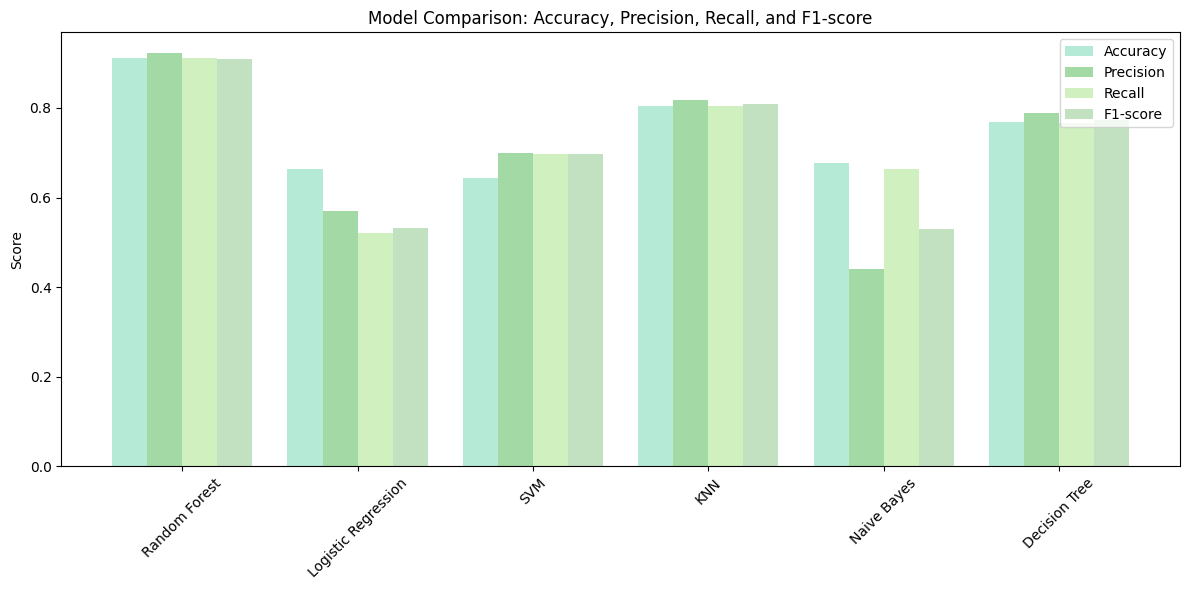

In [40]:
# Building a comparison chart.

labels = list(metrics.keys())
accuracy_vals = [metrics[m][0] for m in labels]
precision_vals = [metrics[m][1] for m in labels]
recall_vals = [metrics[m][2] for m in labels]
f1_vals = [metrics[m][3] for m in labels]

x = np.arange(len(labels))  # label locations
width = 0.2  # width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - 1.5*width, accuracy_vals, width, label='Accuracy', color='#b5ead7')
ax.bar(x - 0.5*width, precision_vals, width, label='Precision', color='#a3d9a5')
ax.bar(x + 0.5*width, recall_vals, width, label='Recall', color='#d0f0c0')
ax.bar(x + 1.5*width, f1_vals, width, label='F1-score', color='#c1e1c1')

ax.set_ylabel('Score')
ax.set_title('Model Comparison: Accuracy, Precision, Recall, and F1-score')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()


plt.tight_layout()
plt.show()


We can see that Random Forest performed way better than other models.

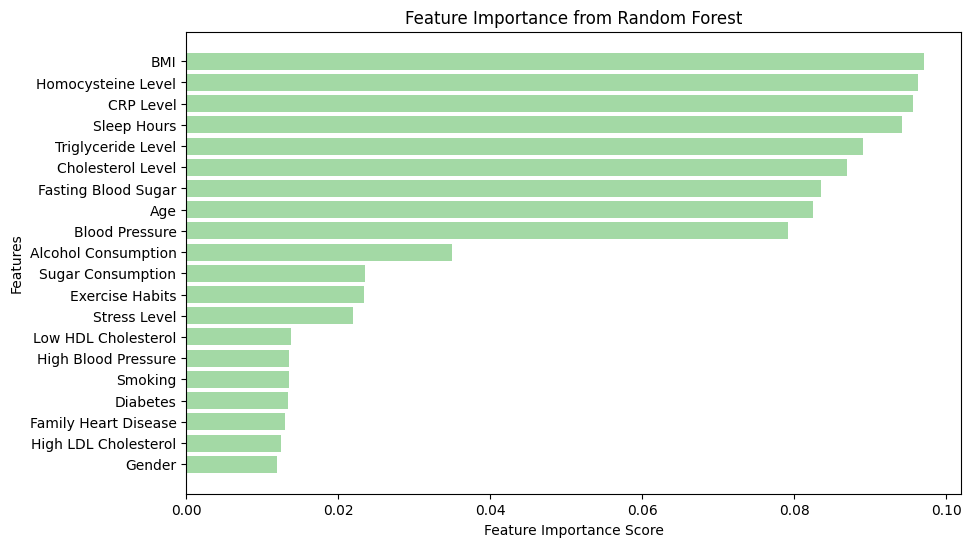

                Feature  Importance
8                   BMI    0.097092
19   Homocysteine Level    0.096233
18            CRP Level    0.095582
14          Sleep Hours    0.094138
16   Triglyceride Level    0.089095
3     Cholesterol Level    0.086952
17  Fasting Blood Sugar    0.083457
0                   Age    0.082490
2        Blood Pressure    0.079164
12  Alcohol Consumption    0.035031


In [42]:
# We can see that Random Forest performed way better than other models.
feature_importances = models["Random Forest"].feature_importances_

feature_names = X_train.columns if hasattr(X_train, 'columns') else [f"Feature {i}" for i in range(X_train.shape[1])]
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importances})

importance_df = importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"], color='#a3d9a5')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance from Random Forest")
plt.gca().invert_yaxis()
plt.show()

print(importance_df.head(10))

This bar chart shows the feature importance scores from the best model (Random Forest). Cholesterol Level, and BMI are the most significant predictors, suggesting their strong correlation with the target outcome. Features like gender and diabetes have lower importance in the model. It helps to understand the key health indicators for the prediction. 

In [ ]:
"""This bar chart shows the feature importance scores from the best model (Random Forest). Cholesterol Level, and BMI are the most significant predictors, suggesting their strong correlation with the target outcome. Features like gender and diabetes have lower importance in the model. It helps to understand the key health indicators for the prediction."""

Confusion Matrix:
 [[1624    0]
 [ 152  624]]


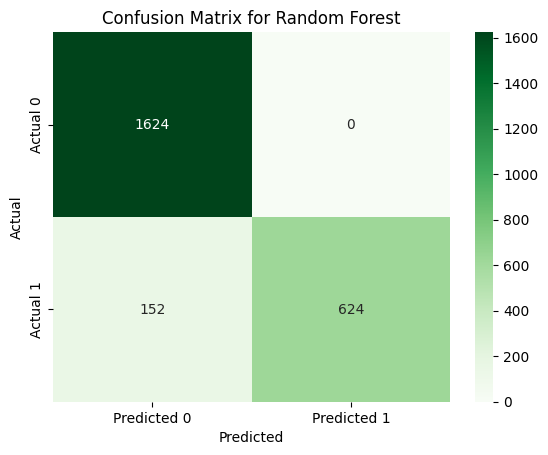

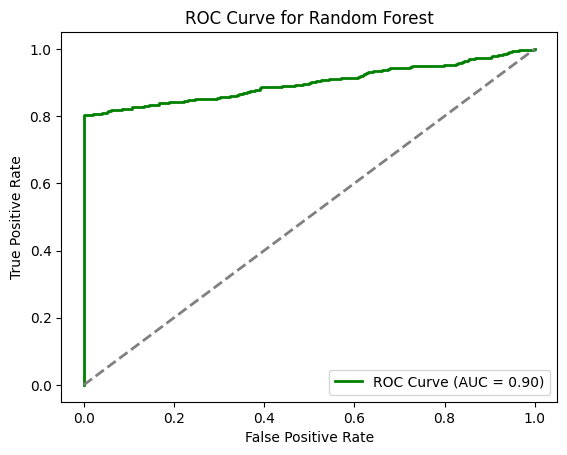

In [43]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

rf_model = RandomForestClassifier(max_depth=20, min_samples_split=2, n_estimators=200, class_weight="balanced", random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

sns.heatmap(
    cm, 
    annot=True, 
    fmt='d', 
    cmap='Greens',  # Changed to green colormap
    xticklabels=['Predicted 0', 'Predicted 1'], 
    yticklabels=['Actual 0', 'Actual 1']
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(
    fpr, 
    tpr, 
    color='green',
    lw=2, 
    label=f'ROC Curve (AUC = {roc_auc:.2f})'
)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Changed baseline to gray
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.show()

In [ ]:
"""For Random Forest Evaluation we generated the confusion matrix. You can see that the model made zero false positive predictions — meaning it never wrongly predicted heart disease when there wasn’t any — and it correctly identified 624 out of 776 positive cases. It missed 152, which we call false negatives. So, while the model is very strong, especially for class 0, there's still room to improve recall for actual heart disease cases. The ROC curve for the Random Forest model. The area under the curve, or AUC, is 0.90. That’s quite high and indicates the model is very capable of distinguishing between people with and without heart disease."""

For Random Forest Evaluation we generated the confusion matrix. You can see that the model made zero false positive predictions — meaning it never wrongly predicted heart disease when there wasn’t any — and it correctly identified 624 out of 776 positive cases. It missed 152, which we call false negatives. So, while the model is very strong, especially for class 0, there's still room to improve recall for actual heart disease cases.
The ROC  curve for the Random Forest model. The area under the curve, or AUC, is 0.90. That’s quite high and indicates the model is very capable of distinguishing between people with and without heart disease.

In [ ]:
"""
Conclusion

Random Forest can be a powerful tool for predicting heart disease risk. It's accurate, accessible, and has the potential to assist doctors and patients with early detection. In the future, I’d like to improve the model further with smarter feature selection and testing on real-world clinical data.
"""

## Conclusion
Random Forest can be a powerful tool for predicting heart disease risk. It's accurate, accessible, and has the potential to assist doctors and patients with early detection. In the future, I’d like to improve the model further with smarter feature selection and testing on real-world clinical data.